In [ ]:
!pip install cx_Oracle

In [3]:
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect("c##lm", "lm", 'localhost:1521/xe')
cursor =db.cursor()
cursor.execute("select * from DEMO")
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='DEMO'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
df.columns = list1
df.head()

,고객번호,성별,연령대,거주지역
0,00751,M,60세이상,100
1,00752,M,60세이상,440
2,00753,F,60세이상,060
3,00754,F,60세이상,055
4,00755,F,60세이상,100


In [5]:
col

[('고객번호',), ('성별',), ('연령대',), ('거주지역',)]

과제2_0512. 과제1에서 작성한 테이블을 주피터로 불러오세요.

In [7]:
df_lm = pd.read_csv('df_lm.csv',index_col=0)
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0
2,3,851215,1042554,592280,679118,M,60세이상,33.0
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0


In [8]:
# Q H1 대비 H4간의 구매감소 고객의 비중을 구하세요.
len(df_lm[df_lm.H4 < df_lm.H1])/len(df_lm)

0.4273332301501316

In [9]:
# H1 대비 H4간 고객별 성장율 컬럼을 추가하세요.
df_lm['성장률']=(df_lm.H4-df_lm.H1)/df_lm.H1
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,성장률
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.342420
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.062516
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.202178
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.258790
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.520845


CAGR(Compound Annual Growth Rate)
- 연복리 성장률을 나타내는 지표
- 주어진 기간 동안의 성장률을 하나의 수치로 요약하여 비교 및 분석에 용이
- 장점은 단순 평균 수익률보다 정확한 성장률을 제공하고, 시간에 따른 변동성을 고려하여 성장률을 측정
- 한계는 특정기간 동안의 평균 성장률을 알려주지만, 성장률의 변동성이나 시계열 데이터의 패턴은 미 반영
- 변동성이나 패턴을 반영하는 지표는 표준편차, 변동계수, 이동평균, 지수 이동평균, 상대강도지수 등이 있음
- CAGR = (최종 가치 / 초기 가치) ^ (1 / 기간) - 1

In [10]:
# cagr 칼럼을 추가하세요.
df_lm['cagr'] = (df_lm.H4/ df_lm.H1)**(1/4)-1
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,성장률,cagr
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.342420,-0.099493
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.062516,0.015275
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.202178,-0.054903
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.258790,-0.072134
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.520845,-0.168008


In [12]:
# Q H1 대비 H4간의 cagr 기준으로 구매감소 고객의 비중을 구하세요.
len(df_lm[df_lm.cagr<0])/len(df_lm)

0.4273332301501316

In [14]:
df_lm['증감'] = df_lm.H4 - df_lm.H1
df_lm.증감.describe()

count    1.938300e+04
mean     1.026025e+06
std      2.116641e+07
min     -1.387164e+09
25%     -9.668465e+05
50%      2.954460e+05
75%      1.875210e+06
max      1.007656e+09
Name: 증감, dtype: float64

In [15]:
df_lm.head()

,고객번호,H1,H2,H3,H4,성별,연령대,거주지역,성장률,cagr,증감
0,1,19925355,34116312,17898365,13102518,M,60세이상,60.0,-0.342420,-0.099493,-6822837
1,2,24323230,21922100,27791610,25843820,M,60세이상,100.0,0.062516,0.015275,1520590
2,3,851215,1042554,592280,679118,M,60세이상,33.0,-0.202178,-0.054903,-172097
3,4,5042106,4257510,3656937,3737257,F,60세이상,16.0,-0.258790,-0.072134,-1304849
4,5,5460150,2225730,2934930,2616260,M,60세이상,100.0,-0.520845,-0.168008,-2843890


과제3_0512. employees 테이블을 불러와서 다음사항을 수행하세요.

- 컬럼명을 포함하여 employees 테이블을 데이터프레임으로 출력
- department_id별 평균 연봉을 출력
- 부서별 평균 연봉을 수평 그래프로 시각화

In [ ]:
import cx_Oracle
import pandas as pd
db = cx_Oracle.connect("c##hmkd1","hmkd1","localhost:1521/xe")
cursor = db.cursor()
cursor.execute('select * from employees')
x = cursor.fetchall()
df = pd.DataFrame(x)
cursor.execute("""select column_name from user_tab_columns where table_name='EMPLOYEES'""")
col = cursor.fetchall()
col_list = []
for i in col:
    for j in i:
        col_list.append(j)
        
df.columns = col_list
df.head()

In [ ]:
sales_avg = df.groupby('DEPARTMENT_ID').mean().reset_index()
s1 = sales_avg[['DEPARTMENT_ID','SALARY']]
s1.head()

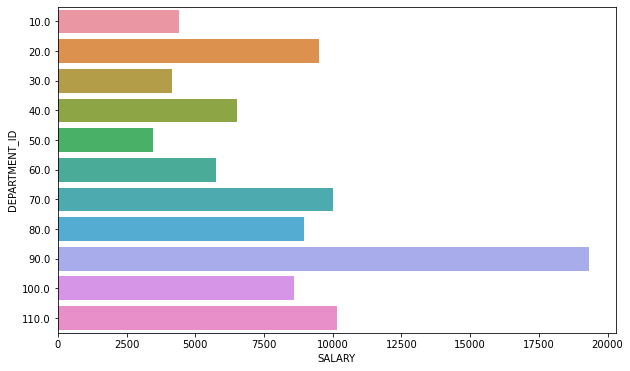

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='SALARY', y='DEPARTMENT_ID', data=s1, orient='h')

과제4_0512. 과제2에서 불러온 데이터프레임을 통계적 시각적으로 탐색하여 인사이트를 도출하세요.